In [1]:
import rasterio
from os import listdir
from os.path import isfile, join

In [21]:
path = 'D:/rambabu_r@nrsc.gov.in/STUDY/MTECH/IIST GeoInformatics Text books/1 SEM\RS/Labs/LST/L8'

In [23]:
files = [f for f in listdir(path) if isfile(join(path,f))]
print(files[10:16])

['LC08_L1TP_144048_20221031_20221108_02_T1_B2.TIF', 'LC08_L1TP_144048_20221031_20221108_02_T1_B3.TIF', 'LC08_L1TP_144048_20221031_20221108_02_T1_B4.TIF', 'LC08_L1TP_144048_20221031_20221108_02_T1_B5.TIF', 'LC08_L1TP_144048_20221031_20221108_02_T1_B6_10_TIR.TIF', 'LC08_L1TP_144048_20221031_20221108_02_T1_B7_11_TIR.TIF']


In [25]:
# reading the metadata of first file
with rasterio.open(path+'/'+files[10]) as src0:
    meta = src0.meta
    meta.update(count = len(files[10:16]))

In [27]:
#read each layer and write it to stack
with rasterio.open('stack_LST_1.tiff', "w",**meta) as dst:
        for id, layer in enumerate (files[10:16], start = 1):
            print(path+'/'+layer)
            with rasterio.open(path+'/'+layer) as src1:
                dst.write_band(id, src1.read(1))
                print('stacked.tiff')
stack = rasterio.open('stack_LST_1.tiff')

D:/rambabu_r@nrsc.gov.in/STUDY/MTECH/IIST GeoInformatics Text books/1 SEM\RS/Labs/LST/L8/LC08_L1TP_144048_20221031_20221108_02_T1_B2.TIF
stacked.tiff
D:/rambabu_r@nrsc.gov.in/STUDY/MTECH/IIST GeoInformatics Text books/1 SEM\RS/Labs/LST/L8/LC08_L1TP_144048_20221031_20221108_02_T1_B3.TIF
stacked.tiff
D:/rambabu_r@nrsc.gov.in/STUDY/MTECH/IIST GeoInformatics Text books/1 SEM\RS/Labs/LST/L8/LC08_L1TP_144048_20221031_20221108_02_T1_B4.TIF
stacked.tiff
D:/rambabu_r@nrsc.gov.in/STUDY/MTECH/IIST GeoInformatics Text books/1 SEM\RS/Labs/LST/L8/LC08_L1TP_144048_20221031_20221108_02_T1_B5.TIF
stacked.tiff
D:/rambabu_r@nrsc.gov.in/STUDY/MTECH/IIST GeoInformatics Text books/1 SEM\RS/Labs/LST/L8/LC08_L1TP_144048_20221031_20221108_02_T1_B6_10_TIR.TIF
stacked.tiff
D:/rambabu_r@nrsc.gov.in/STUDY/MTECH/IIST GeoInformatics Text books/1 SEM\RS/Labs/LST/L8/LC08_L1TP_144048_20221031_20221108_02_T1_B7_11_TIR.TIF
stacked.tiff


In [28]:
LST = rasterio.open('stack_LST_1.tiff')

In [29]:
LST.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 7681,
 'height': 7841,
 'count': 6,
 'crs': CRS.from_epsg(32644),
 'transform': Affine(30.0, 0.0, 89085.0,
        0.0, -30.0, 2037015.0)}

In [31]:
LST.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 7681,
 'height': 7841,
 'count': 6,
 'crs': CRS.from_epsg(32644),
 'transform': Affine(30.0, 0.0, 89085.0,
        0.0, -30.0, 2037015.0)}

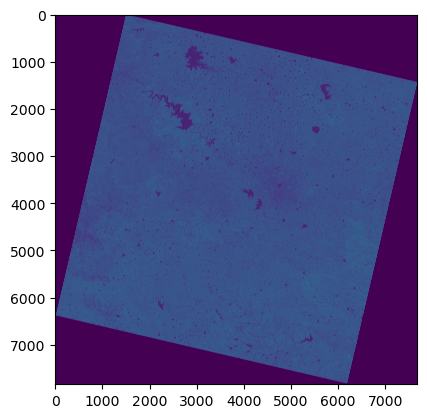

In [42]:
import rasterio
from matplotlib import pyplot
pyplot.imshow(LST.read(4), cmap='viridis')

In [43]:
desc = LST.descriptions
metadata = LST.meta

print('Raster description: {desc}\n'.format(desc=desc))

Raster description: (None, None, None, None, None, None)



In [73]:
# Open the fourth band in our image - NIR here
nir = LST.read(4).astype(float)
red = LST.read(3).astype(float)
nir.shape
red.shape
# check out the dimensions of the image

(7841, 7681)

In [74]:
from osgeo import gdal
import rasterio
import numpy as np
import matplotlib.pyplot as plt
dinom = nir+red
numer = nir-red
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [75]:
nir.flatten().max()

65535.0

In [76]:
red.flatten().max()

54818.0

In [62]:
65535+54818

120353

In [64]:
dinom.flatten().max()

63125

In [66]:
numer.flatten().max()

65535

In [77]:
ndvi = np.where(dinom==0.0, 0.0, numer/dinom)

In [79]:
ndvi.flatten().max()

1.0

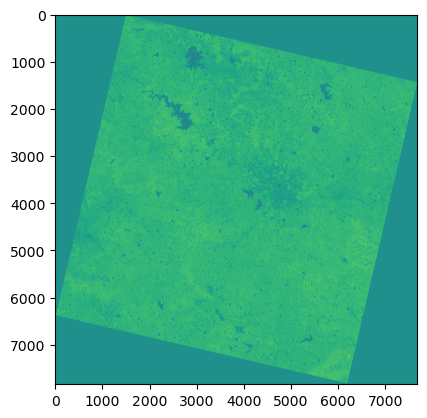

In [80]:
plt.figure()
plt.imshow(ndvi)

In [82]:
out_meta = LST.meta.copy()

out_meta.update({'driver':'GTiff',
                 'width':LST.shape[1],
                 'height':LST.shape[0],
                 'count':1,
                 'dtype':'float64',
                 'crs':LST.crs, 
                 'transform':LST.transform,
                 'nodata':0})

In [83]:

with rasterio.open(fp=r'NDVI.tif', #outputpath_name
             mode='w',**out_meta) as dst:
             dst.write(ndvi, 1) # the numer one is the number of bands

with rasterio.open(fp=r'NDVI.tif', # outputpath_name
             mode='w',**out_meta) as dst:
             dst.write_band(1,ndvi) # the numer one is the number of bands